In [1]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
import numpy as np
import os
import time
import pandas as pd



import matplotlib as mpl
import matplotlib.pyplot as plt

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


In [2]:
R_variable={}  ### used for saved all parameters and data
R_variable['input_dim']=1
R_variable['output_dim']=1
R_variable['train_size']=1000  ### training size
R_variable['batch_size']=R_variable['train_size'] # int(np.floor(R_variable['train_size'])) ### batch size
R_variable['test_size']=R_variable['train_size']  ### test size
R_variable['x_start']=-np.pi/2  #math.pi*3 ### start point of input
R_variable['x_end']=np.pi/2  #6.28/4 #math.pi*3  ### end point of input
R_variable['epoch_num']=300
R_variable['plotepoch']=50

In [3]:
def get_y_func(xs):
    return np.cos(xs)

In [4]:
R_variable['test_inputs']=np.random.rand(R_variable['test_size'],R_variable['input_dim'])*(R_variable['x_end']
-R_variable['x_start'])+R_variable['x_start']
R_variable['train_inputs']=np.random.rand(R_variable['train_size'],R_variable['input_dim'])*(R_variable['x_end']-R_variable['x_start'])+R_variable['x_start']

X_valid = R_variable['test_inputs']
X_train = R_variable['train_inputs']
y_valid = get_y_func(X_valid)
y_train = get_y_func(X_train)

In [10]:
class PlotCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch%(R_variable['plotepoch'])==0:
            self.ploty(epoch)
    
    def save_fig(self,fig_id, tight_layout=True, fig_extension="png", resolution=300):
        path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
        plt.savefig(path, format=fig_extension, dpi=resolution)

    def ploty(self,pic_id):
        y_predict = self.model.predict(X_valid)

        if R_variable['input_dim']==2:
            # Make data.
            X = np.arange(R_variable['x_start'], R_variable['x_end'], 0.1)
            Y = np.arange(R_variable['x_start'], R_variable['x_end'], 0.1)
            X, Y = np.meshgrid(X, Y)
            xy=np.concatenate((np.reshape(X,[-1,1]),np.reshape(Y,[-1,1])),axis=1)
            Z = np.reshape(get_y_func(xy),[len(X),-1])
            fp = plt.figure()
            ax = fp.gca(projection='3d')
            # Plot the surface.
            surf = ax.plot_surface(X, Y, Z-np.min(Z), cmap=cm.coolwarm,linewidth=0, antialiased=False)
            # Customize the z axis.
            #ax.set_zlim(-2.01, 2.01)
            ax.zaxis.set_major_locator(LinearLocator(5))
            ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
            # Add a color bar which maps values to colors.
            fp.colorbar(surf, shrink=0.5, aspect=5)
            ax.scatter(X_valid[:,0], X_valid[:,1], y_predict-np.min(y_predict))
            self.save_fig("predict_plot_"+"%s"%(pic_id))
        if R_variable['input_dim']==1:
            plt.figure(pic_id)
            plt.grid()
            plt.scatter(X_valid,y_predict,c='r',s=10,label='Test')
            # plt.scatter(X_train,y_train,c='g',s=10,label='Train')
            plt.scatter(X_valid,y_valid, c='b',s=10,label='True')
            plt.legend(loc='best')
            self.save_fig("predict_plot_"+"%s"%(pic_id))
 
plot_cb = PlotCallback()


Epoch 1/300
1/1 [==============================] - 0s 216ms/step - loss: 0.5009 - val_loss: 0.6085
Epoch 2/300
1/1 [==============================] - 0s 21ms/step - loss: 0.6131 - val_loss: 0.4030
Epoch 3/300
1/1 [==============================] - 0s 19ms/step - loss: 0.3935 - val_loss: 0.3710
Epoch 4/300
1/1 [==============================] - 0s 23ms/step - loss: 0.3574 - val_loss: 0.3793
Epoch 5/300
1/1 [==============================] - 0s 19ms/step - loss: 0.3690 - val_loss: 0.3097
Epoch 6/300
1/1 [==============================] - 0s 19ms/step - loss: 0.3018 - val_loss: 0.2249
Epoch 7/300
1/1 [==============================] - 0s 19ms/step - loss: 0.2179 - val_loss: 0.1805
Epoch 8/300
1/1 [==============================] - 0s 20ms/step - loss: 0.1737 - val_loss: 0.1740
Epoch 9/300
1/1 [==============================] - 0s 20ms/step - loss: 0.1668 - val_loss: 0.1646
Epoch 10/300
1/1 [==============================] - 0s 19ms/step - loss: 0.1568 - val_loss: 0.1334
Epoch 11/300
1/1 [

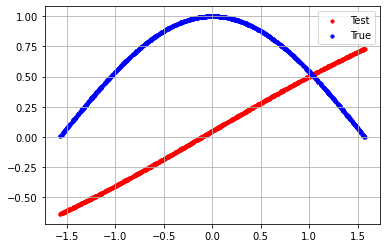

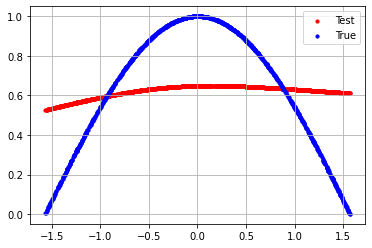

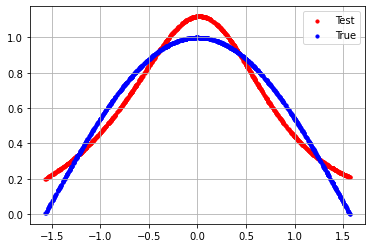

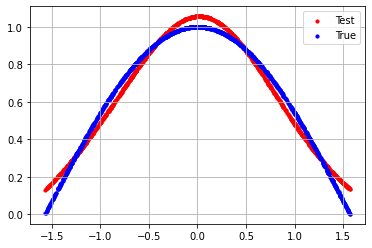

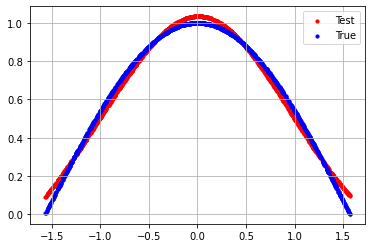

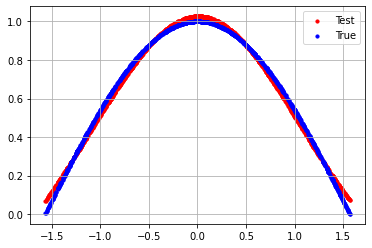

In [11]:
model = keras.models.Sequential([
    keras.layers.Dense(200, activation="tanh", input_shape=X_train.shape[1:]),
    keras.layers.Dense(200,activation="tanh"),
    keras.layers.Dense(200,activation="tanh"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=R_variable['epoch_num'], validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb,plot_cb], batch_size=R_variable['batch_size'])

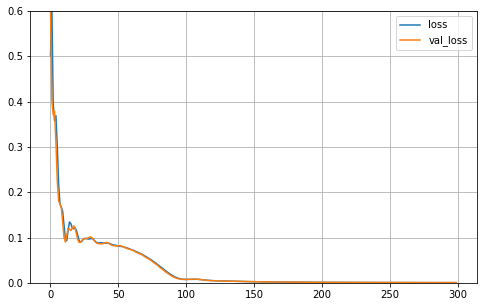

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.6) # set the vertical range to [0-1]
plt.show()